## Kaggle: TGS Salt Identification Challenge
**Segment salt deposits beneath the Earth's surface**
_____

In [146]:
import os
from os import listdir
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
%matplotlib inline

### Explore Data

In [33]:
test_images_dir = listdir('data/test')
train_images = listdir('data/train/' + '/images')
train_mask = listdir('data/train/' + '/masks')
print('Total Train Images: {}'.format(len(train_images)))
print('Total Test Images: {}'.format(len(test_images)))

Total Train Images: 4000
Total Test Images: 18000


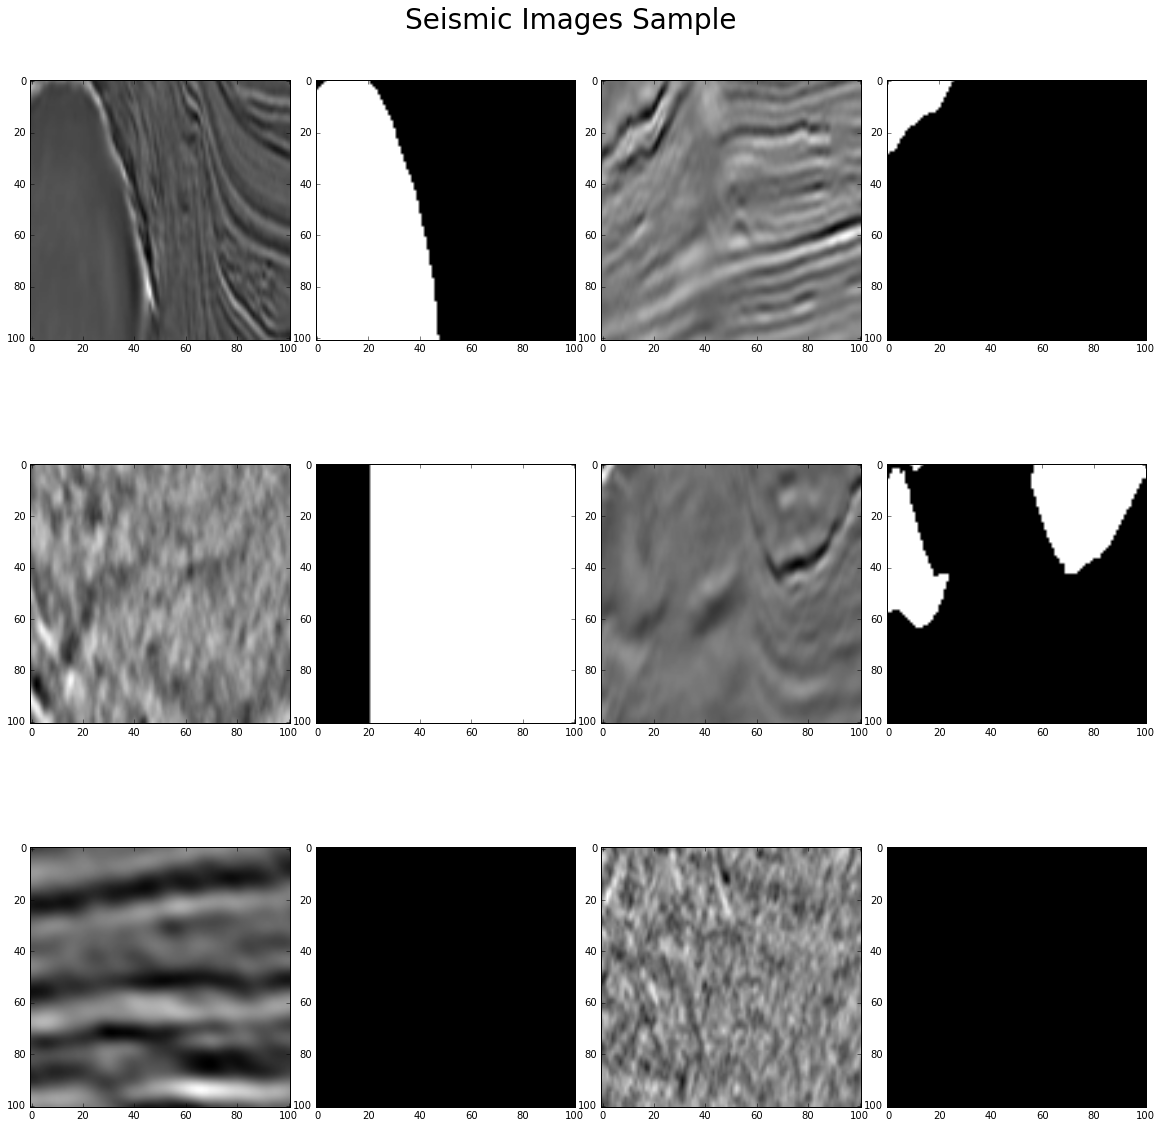

In [180]:
def plot_seismic(n_images,images,masks,path='data/train/',n_col=2):
    
    """ Randomly Sample 'N' Plots for Visualizations"""
    
    # Rows
    n_row = int(np.floor(n_images/n_col))
    
    fig = plt.figure(figsize=(20,20))
    plt.subplots_adjust(hspace=0.10,wspace=0.10)
    for idx,i in enumerate(range(n_row*n_col)):

        img = np.random.randint(0,4000)
        
        plt.subplot(n_row,n_col*2,(idx+1)*2-1)
        plt.imshow(load_img(path + 'images/' + images[img]),interpolation=None)
        
        plt.subplot(n_row,n_col*2,(idx+1)*2)
        plt.imshow(load_img(path + 'masks/' + images[img]),interpolation=None)
        
    plt.suptitle('Seismic Images Sample',fontsize=28,y=0.92)
    plt.show()
    
plot_seismic(6,train_images,train_mask)

In [177]:
def get_visualization(original,filt):
    
    """ Return Contrast Visualization between original and Filtered image """
    
    fig = plt.figure(figsize=(12,8))
    layout =(1,2)
    
    ax_orig = plt.subplot2grid(layout,(0,0))
    ax_filt = plt.subplot2grid(layout,(0,1))
    
    ax_orig.imshow(original,cmap='gray')
    ax_filt.imshow(filt,cmap='gray')
    
    ax_orig.set_title('Original Filter',fontsize=16,y=1.02)
    ax_filt.set_title('Convolution Filter',fontsize=16,y=1.02)
    
def  convolve(image,kernel):
    
    """ Convolution Filter"""
    
    #Get Dimensions of Image (Height and Width)
    (iH, iW) = image.shape[:2]
    
    #Get Dimensions of Kernel (Height and Width)
    (kH, kW) = kernel.shape[:2]
    
    #Kernel is odd value -- compute padding width
    pad = int((kW - 1) / 2)
    
    #Replicate Borders
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    
    #Setup Empty image shape
    output = np.zeros((iH, iW), dtype="float32")
    
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            r = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = (r * kernel).sum()
            output[y - pad, x - pad] = k
        
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output
              
def sharpen_filter():
    
    """ Filter to Sharpen Image"""
    
    f = np.array((
                    [0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]), dtype="int")
    return(f)


def blurr_filter(size=11):
    
    """
    Filter to Blurr Image 
    Note: The larger the kernel size is, then the more the image will be blurred
    """
    
    f = np.ones((size,size),dtype="float") * (1.0 / (size*size))
    return(f)

if __name__ == '__main__':
    
    # Get Random Image to Test Convolution
    idx = int(np.random.randint(0,len(train_images)))
    image = cv2.cvtColor(cv2.imread('data/train/images/{}'.format(train_images[idx])), cv2.COLOR_BGR2GRAY)
  
    #Sharpen Filter
    s = sharpen_filter()
    
    # Blurr Image
    b= blurr_filter()

### Sharpen Images

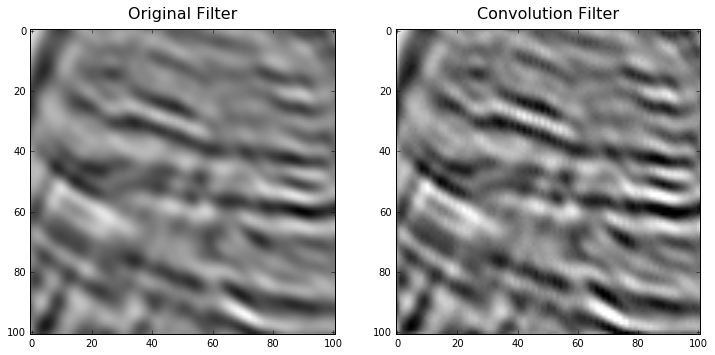

In [178]:
img_sharp = convolve(image,s)
get_visualization(image,img_sharp)

### Blurr Images

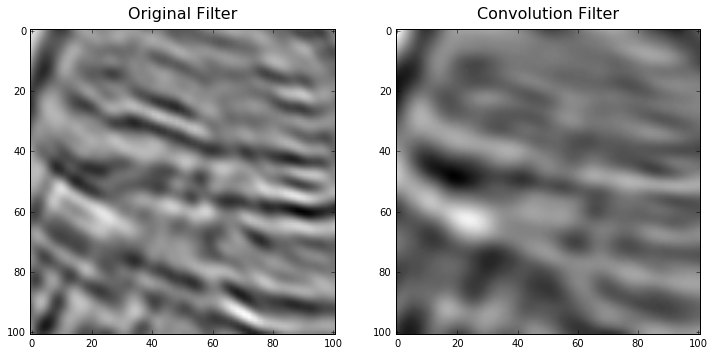

In [179]:
img_sharp = convolve(image,b)
get_visualization(image,img_sharp)